In [1]:
import nltk
import pymorphy2
import gensim
import pyLDAvis

C:\Users\User\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [5]:
name = '"Sociology2019"'
f_in2 = open('Text2019.txt', 'r')
text = f_in2.read()\

In [6]:
print (text)

"От снижения поддержки Путина до ностальгии по СССР - соцопросы популярны в СМИ, но доверие к ним среди россиян падает, многие опасаются говорить правду. Как относиться к их результатам? Можно ли  доверять социологическим опросам в СМИ? Этот вопрос задает себе каждый, кто сталкивается с ними, - будь то журналист, эксперт или среднестатистический житель. Почему результаты соцопросов не всегда совпадают с личными ощущениями? Как к ним относиться? Эти мысли посещают людей в любой стране, но Россия в этом ряду - особый случай.
Рекордно низкое доверие к соцопросам в России. Согласно опубликованным в ноябре 2018 года данным Всероссийского центра изучения общественного мнения (ВЦИОМ), измеряемый им ""индекс доверия социологическим опросам"" достиг рекордно низкого уровня. Этот индекс снизился до 12 пунктов по сравнению с 43 в 2005 году. 27 процентов опрошенных (еще один рекорд за 13 лет) считают, что результаты опросов ""скорее, не отражают"" мнение граждан. Еще 10 процентов уверены, что опро

In [7]:
tokens = [t for t in text.split()] 
print (tokens)

['"От', 'снижения', 'поддержки', 'Путина', 'до', 'ностальгии', 'по', 'СССР', '-', 'соцопросы', 'популярны', 'в', 'СМИ,', 'но', 'доверие', 'к', 'ним', 'среди', 'россиян', 'падает,', 'многие', 'опасаются', 'говорить', 'правду.', 'Как', 'относиться', 'к', 'их', 'результатам?', 'Можно', 'ли', 'доверять', 'социологическим', 'опросам', 'в', 'СМИ?', 'Этот', 'вопрос', 'задает', 'себе', 'каждый,', 'кто', 'сталкивается', 'с', 'ними,', '-', 'будь', 'то', 'журналист,', 'эксперт', 'или', 'среднестатистический', 'житель.', 'Почему', 'результаты', 'соцопросов', 'не', 'всегда', 'совпадают', 'с', 'личными', 'ощущениями?', 'Как', 'к', 'ним', 'относиться?', 'Эти', 'мысли', 'посещают', 'людей', 'в', 'любой', 'стране,', 'но', 'Россия', 'в', 'этом', 'ряду', '-', 'особый', 'случай.', 'Рекордно', 'низкое', 'доверие', 'к', 'соцопросам', 'в', 'России.', 'Согласно', 'опубликованным', 'в', 'ноябре', '2018', 'года', 'данным', 'Всероссийского', 'центра', 'изучения', 'общественного', 'мнения', '(ВЦИОМ),', 'измеряемы

In [8]:
import string
def tokenizer(text):
    for elem in set(string.punctuation + '«»…—'):
        if elem in text:
            text = text.replace(elem, ' ')
    return(''.join(word for word in text if not word.isdigit()).lower().split())
tokens = tokenizer(text)
print(tokens)

['от', 'снижения', 'поддержки', 'путина', 'до', 'ностальгии', 'по', 'ссср', 'соцопросы', 'популярны', 'в', 'сми', 'но', 'доверие', 'к', 'ним', 'среди', 'россиян', 'падает', 'многие', 'опасаются', 'говорить', 'правду', 'как', 'относиться', 'к', 'их', 'результатам', 'можно', 'ли', 'доверять', 'социологическим', 'опросам', 'в', 'сми', 'этот', 'вопрос', 'задает', 'себе', 'каждый', 'кто', 'сталкивается', 'с', 'ними', 'будь', 'то', 'журналист', 'эксперт', 'или', 'среднестатистический', 'житель', 'почему', 'результаты', 'соцопросов', 'не', 'всегда', 'совпадают', 'с', 'личными', 'ощущениями', 'как', 'к', 'ним', 'относиться', 'эти', 'мысли', 'посещают', 'людей', 'в', 'любой', 'стране', 'но', 'россия', 'в', 'этом', 'ряду', 'особый', 'случай', 'рекордно', 'низкое', 'доверие', 'к', 'соцопросам', 'в', 'россии', 'согласно', 'опубликованным', 'в', 'ноябре', 'года', 'данным', 'всероссийского', 'центра', 'изучения', 'общественного', 'мнения', 'вциом', 'измеряемый', 'им', 'индекс', 'доверия', 'социологи

In [13]:
bag_of_words = tokenizer(text)

In [14]:
word_us_numb = len(bag_of_words)
print('The number of total word usage in the book', name, ': ', word_us_numb)

The number of total word usage in the book "Sociology2019" :  21174


In [15]:
set_of_words = set(bag_of_words)
word_form_numb = len(set_of_words)
print('The number of different word forms in the book', name, ': ', word_form_numb)

The number of different word forms in the book "Sociology2019" :  5690


In [16]:
lens_of_words = [len(word) for word in bag_of_words]
print('Average word length in the book', name, ': ', round(sum(lens_of_words)/len(lens_of_words),2))

Average word length in the book "Sociology2019" :  5.98


In [17]:
import collections as cl #библиотека для подсчета в списке количества элементов
from matplotlib import pyplot as plt #библиотека для построения диаграммы
get_ipython().run_line_magic('matplotlib', 'inline')
dist_distr = cl.Counter(lens_of_words)
sorted_elems = sorted(dist_distr.items())
keys = [i[0] for i in sorted_elems]
values = [i[1] for i in sorted_elems]

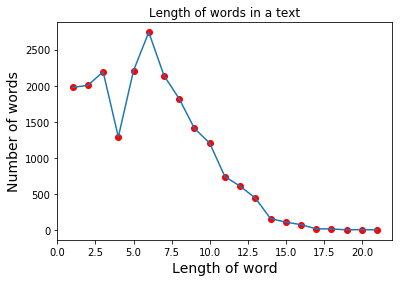

In [18]:
plt.title('Length of words in a text')
plt.xlabel('Length of word', fontsize=14)
plt.ylabel('Number of words', fontsize=14)
plt.plot(keys, values, 'ro')
plt.plot(keys, values)

In [20]:
bag_of_sentences = [sent for sent in text.split('.') if (sent != '') ]
list_of_bags = [tokenizer(sent) for sent in bag_of_sentences]
lens_of_sentences = [len(list) for list in list_of_bags]
average_len_of_sentence = round(sum(lens_of_sentences)/len(lens_of_sentences), 2)
print('Average length of sentence in the text', name, ': ', average_len_of_sentence)

Average length of sentence in the text "Sociology2019" :  16.02


In [22]:
dist_distr = cl.Counter(lens_of_sentences)
sorted_elems = sorted(dist_distr.items())
keys = [i[0] for i in sorted_elems]
values = [i[1] for i in sorted_elems]

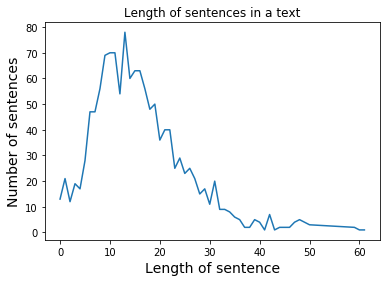

In [23]:
plt.title('Length of sentences in a text')
plt.xlabel('Length of sentence', fontsize=14)
plt.ylabel('Number of sentences', fontsize=14)
#plt.plot(keys, values, 'ro')
plt.plot(keys, values)

In [ ]:
# Cleam tokens without stopwords 

In [24]:
from nltk.corpus import stopwords
stopwords.words('russian')

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [27]:
clean_tokens = tokens[:] 
sr = stopwords.words('russian')
for token in tokens:
    if token in sr:
        clean_tokens.remove(token)

In [28]:
freq = nltk.FreqDist(clean_tokens) 
for key, val in freq.items(): 
    print (str(key) + ':' + str(val))

снижения:2
поддержки:12
путина:49
ностальгии:1
ссср:3
соцопросы:8
популярны:2
сми:13
доверие:20
среди:10
россиян:36
падает:9
многие:12
опасаются:2
говорить:16
правду:3
относиться:4
результатам:6
доверять:19
социологическим:4
опросам:11
вопрос:77
задает:3
каждый:19
сталкивается:1
ними:6
будь:2
журналист:6
эксперт:3
среднестатистический:1
житель:1
почему:26
результаты:34
соцопросов:9
совпадают:1
личными:1
ощущениями:1
мысли:1
посещают:1
людей:41
любой:8
стране:12
россия:5
ряду:2
особый:1
случай:3
рекордно:2
низкое:1
соцопросам:3
россии:40
согласно:17
опубликованным:2
ноябре:1
года:21
данным:12
всероссийского:5
центра:23
изучения:17
общественного:39
мнения:46
вциом:92
измеряемый:1
индекс:2
доверия:51
достиг:5
низкого:1
уровня:12
снизился:3
пунктов:1
сравнению:1
году:12
процентов:17
опрошенных:20
рекорд:1
лет:29
считают:11
опросов:35
скорее:12
отражают:2
мнение:61
граждан:13
уверены:1
опросы:47
безусловно:1
общественное:17
хотя:8
большинство:16
прежнему:1
доверяет:8
выяснил:2
левада:27
цен

подвижный:1
образ:1
менее:8
ранее:23
появились:4
сообщения:2
ссылкой:1
прошлом:2
выразили:4
желание:2
появлении:1
возможности:5
российской:5
культуре:2
слишком:4
глубоко:2
прошито:2
различие:4
каким:6
являешься:2
деле:7
хочешь:2
окружающих:2
рассказывать:2
незнакомцу:2
думаешь:3
реальности:7
считается:1
признаком:1
лоха:2
интересную:1
гипотезу:2
проходят:3
фб:1
публицист:1
шмелев:1
пару:2
интересом:1
читал:1
бесконечные:1
споры:5
вокруг:6
разного:3
рода:8
лез:1
сохраняю:1
остаточное:1
уважение:1
научным:5
регалиям:1
имею:1
социологического:5
образования:1
степени:2
высказаться:1
хотелось:2
сталкивался:7
необходимостью:1
сограждан:1
основном:4
прикладных:1
целях:2
избирательных:2
кампаний:2
пиар:1
маркетинга:1
кажется:6
интуитивно:1
эмпирически:1
чувствую:1
наткнулся:1
статью:1
коммерсанте:1
мои:1
предположения:1
подтверждают:2
степенями:1
статусами:1
могу:3
спокойно:1
написать:1
боясь:1
показаться:2
профаном:1
итак:1
взгляд:4
никакие:2
современной:3
восприниматься:2
думают:7
чему:1
либ

кем:2
проведенного:1
вмиг:1
нормальной:1
кампании:1
обсуждению:2
ключевой:2
проблемы:3
течение:7
месяца:5
публичным:1
контролем:2
процесса:2
подсчёта:1
голосов:2
избирательной:1
комиссией:1
которая:11
отчитываться:2
горожанами:1
мутных:1
чьи:1
контракты:2
зависят:3
екатеринбуржцы:4
заставили:1
высокомерного:1
начать:1
переговоры:1
выйти:1
откатить:1
впечатляет:1
заморочить:1
голову:2
цифрами:2
которыми:3
получится:1
иметь:3
пределами:1
прорабатывать:1
депутатами:5
городской:4
прошедшей:1
журналистами:3
гд:1
предложили:3
думе:2
компромисс:1
храмом:2
возможных:2
форм:1
делаться:1
законом:1
местном:1
самоуправлении:1
будем:2
законную:1
легитимную:1
сроки:2
проведен:5
уточняются:1
организация:3
выбрана:1
самих:1
количества:1
консультироваться:1
вчерашние:1
микрорайона:1
стройка:2
гордума:1
склоняется:1
живет:3
близко:1
открыли:1
горячую:1
линию:2
высокинского:3
главное:3
привести:1
выбрано:1
средства:1
выделены:1
бюджета:1
конкурс:1
экономии:3
займется:1
большее:1
узнали:1
которой:7
наша:3

положительно:4
ответили:3
дмитрию:3
медведеву:3
жириновскому:3
геннадию:3
зюганову:3
сергею:2
миронову:2
изменил:3
политикам:18
новый:4
раздел:3
респондентам:14
закрытый:12
скажите:5
пожалуйста:5
список:3
пяти:3
геннадий:4
зюганов:4
сергей:5
миронов:4
проведенному:2
исследованию:3
превышает:2
одобрения:9
деятельности:8
“ъ:2
fm”:2
смотреть:4
одобрять:6
господин:3
предлагалось:3
открытый:10
методике:14
черных:4
очков:4
острая:2
кризиса:3
закончилась:2
реальные:4
увеличиваются:3
надежда:2
благосостояния:2
оправдалась:2
негативно:4
влияет:5
разъяснить:1
применяли:1
методики:6
начал:2
измерять:1
ответе:4
главе:4
государству:1
прямо:4
интересуемся:2
лидерам:2
отечественной:2
политики:3
называя:2
имена:3
фамилии:3
старой:3
любое:4
составляет:3
составил:5
расхождение:1
цифрах:2
вызывало:1
недовольство:2
коррелируют:3
отмечал:1
попросивший:1
сведения:2
содержаться:1
проведенном:1
премьер:1
министру:1
лидеру:1
коммунистов:1
получили:1
задавая:1
россиянам:3
потребовали:3
противоречивых:1
опублико

граждане:2
реже:2
действующей:1
оппозиция:1
зачастую:2
получает:2
предварительные:1
решил:2
организаций:1
составили:1
китов:1
росстат:4
орган:1
исполнительной:1
исключительно:1
фактические:1
материальной:1
расходы:1
коров:1
долгов:1
болезни:1
интересует:1
материальная:1
духовная:1
настроения:1
независимая:1
исследовательская:1
присвоен:1
иностранного:2
агента:3
зарубежных:1
грантов:1
различную:1
собственности:1
организационную:1
структуру:1
используют:2
одинаковые:1
инструменты:3
очно:1
касались:1
истинные:1
придуманные:1
анкетами:1
борются:1
двум:1
направлениям:1
отдела:1
вероника:2
бизюкова:2
направление:3
маршрутов:1
старта:1
соблюдение:1
нюансов:1
случайности:1
отбора:1
отследить:1
помогает:2
геолокация:1
планшета:1
загружают:1
второе:2
прослушивание:1
соответствия:1
помимо:2
проверка:1
специальных:1
программ:1
рисованные:1
проявления:1
фантазия:1
заканчивается:2
вымышленных:1
персонажей:1
отловить:1
похожие:1
бездумно:1
заполняет:1
вчитываясь:1
программы:1
проверки:3
улавливают:1


ассоциациях:1
приходящих:1
конкретный:1
уточняющими:1
дающими:1
некоторое:1
интерпретации:1
когнитивных:1
анализов:1
большому:1
полугодии:1
сталкиваемся:1
глубочайшей:1
проблемой:1
пределы:1
управленцев:2
лучшего:1
управленческая:1
культура:1
лучшем:1
своем:1
состоянии:2
руководители:1
простым:1
понятным:1
шкалам:1
любят:1
скажет:1
разбираться:1
сотне:1
попросит:1
шкалу:1
превращают:1
шкальные:1
атрибуты:1
бинарного:1
происходят:1
чудовищные:1
насилием:1
страной:1
страна:1
начинать:1
ходьбу:1
правой:1
ноги:1
левой:1
захотели:1
становятся:1
механизмом:1
принуждения:1
начинает:1
соглашаться:1
важное:1
понятие:1
одобряемое:2
поведение:2
смеетесь:1
юродствуете:1
врете:1
скрываете:1
настоящие:1
смех:1
удивление:1
скрыть:1
страшно:1
начинаете:2
согласуется:1
вашим:1
старики:1
неприлично:1
ходить:2
улицам:1
смеяться:1
годам:1
успеть:1
насладиться:1
дано:1
природы:1
убежденность:1
ущербности:1
неспособности:1
культивируется:1
безобидной:1
формулой:1
одобряемого:1
поведения:1
неспециалисту:1
пл

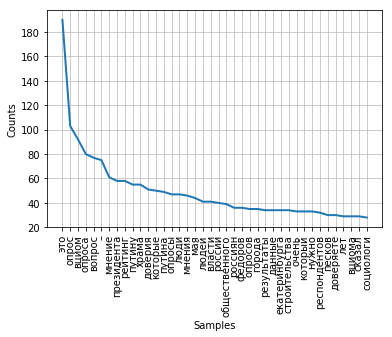

In [29]:
get_ipython().run_line_magic('matplotlib', 'inline')
freq.plot(40, cumulative=False)

In [42]:
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [43]:
morph = pymorphy2.MorphAnalyzer()
dict = [morph.parse(word) for word in clean_tokens] #обработанный с помощью парсера словарь слов с информацией о каждом слове
normal_forms = [word[0].normal_form for word in dict]
print(normal_forms)

['снижение', 'поддержка', 'путин', 'ностальгия', 'ссср', 'соцопрос', 'популярный', 'сми', 'доверие', 'среди', 'россиянин', 'падать', 'многие', 'опасаться', 'говорить', 'правда', 'относиться', 'результат', 'доверять', 'социологический', 'опрос', 'сми', 'вопрос', 'задавать', 'каждый', 'сталкиваться', 'они', 'быть', 'журналист', 'эксперт', 'среднестатистический', 'житель', 'почему', 'результат', 'соцопрос', 'совпадать', 'личный', 'ощущение', 'относиться', 'мысль', 'посещать', 'человек', 'люба', 'страна', 'россия', 'ряд', 'особый', 'случай', 'рекордно', 'низкий', 'доверие', 'соцопрос', 'россия', 'согласно', 'опубликовать', 'ноябрь', 'год', 'данные', 'всероссийский', 'центр', 'изучение', 'общественный', 'мнение', 'вциома', 'измерять', 'индекс', 'доверие', 'социологический', 'опрос', 'достигнуть', 'рекордно', 'низкий', 'уровень', 'индекс', 'снизиться', 'пункт', 'сравнение', 'год', 'процент', 'опросить', 'рекорд', 'год', 'считать', 'результат', 'опрос', 'скорее', 'отражать', 'мнение', 'гражда

In [44]:
freq = nltk.FreqDist(normal_forms) 
for key, val in freq.items(): 
    print (str(key) + ':' + str(val))

снижение:13
поддержка:16
путин:129
ностальгия:1
ссср:3
соцопрос:32
популярный:3
сми:13
доверие:97
среди:10
россиянин:51
падать:17
многие:12
опасаться:5
говорить:58
правда:8
относиться:14
результат:65
доверять:85
социологический:28
опрос:324
вопрос:169
задавать:21
каждый:30
сталкиваться:9
они:8
быть:33
журналист:17
эксперт:5
среднестатистический:1
житель:36
почему:26
совпадать:1
личный:16
ощущение:4
мысль:2
посещать:1
человек:133
люба:8
страна:29
россия:45
ряд:5
особый:1
случай:21
рекордно:2
низкий:7
согласно:17
опубликовать:12
ноябрь:1
год:72
данные:12
всероссийский:19
центр:65
изучение:20
общественный:78
мнение:127
вциома:121
измерять:3
индекс:4
достигнуть:7
уровень:30
снизиться:3
пункт:3
сравнение:1
процент:33
опросить:27
рекорд:1
считать:29
скорее:12
отражать:2
гражданин:19
уверить:3
безусловно:1
хотя:8
большинство:30
прежний:2
выяснить:3
левада:34
четверть:4
избегать:1
социолог:80
положение:3
дело:18
негативный:2
последствие:5
активно:1
обсуждаться:4
президентский:4
выбор:16
особен

возле:3
свердловский:4
театр:11
драма:10
святой:17
риа:3
сообщить:17
помощница:1
завтра:3
подробность:1
приводить:2
совместно:1
собираться:1
замглавы:1
инициатива:4
проведение:26
против:24
высокинский:17
эфир:2
коммерсантъ:1
fm:1
горадминистрация:1
рассчитывать:1
занять:5
около:4
показывать:12
равнодушный:1
небольшой:4
выступить:5
поддержать:6
возведение:5
онф:3
сочи:1
происходить:13
простой:8
способ:5
ежедневно:2
несанкционированный:1
митинговать:1
возвести:1
летие:1
отмечаться:4
инициатор:2
чиновница:1
назвать:14
хорошеть:1
неоднократно:2
горожанин:15
екатеринбуржец:8
тысяча:8
вырубка:1
задержать:6
пожаловаться:1
избиение:1
задержание:2
отдел:3
полиция:5
построить:10
меценат:1
епархия:2
намерить:3
отменять:1
подчиниться:3
ближний:3
день:32
подвести:1
следующий:10
znak:3
com:1
район:7
выйти:4
форма:13
разместить:1
попробовать:1
избежать:1
обвинение:1
ангажированность:2
палата:2
область:10
оставаться:4
открытый:25
сбор:5
персональный:1
анкетирование:1
жёсткий:1
требование:5
издание:2
п

неоднозначный:1
наверное:3
растеряться:1
основный:3
коллизия:1
тайно:1
шесть:4
дождь:1
разница:1
пожурить:1
расценивать:1
исполнитель:1
определяться:5
договорный:1
шаг:1
разобраться:1
пол:3
выясниться:2
аналитик:1
взбесить:1
предъявлять:2
изучать:5
сфера:3
рынок:2
памперс:1
сковородка:1
оправданный:1
ярость:1
подкидывать:1
ёмкость:1
технический:2
убедительно:1
повести:1
полнота:2
вставлять:1
коммуникация:9
диковинно:1
базовый:2
персона:1
сквозь:1
экран:1
телевизор:1
позитивный:3
ключ:1
понравиться:3
интерпретировать:1
замерять:1
эпизод:1
аналитика:3
методологический:2
особенность:3
надеть:1
перестать:1
интерпретация:2
ad:1
hoc:1
лата:1
ред:2
похоже:1
оправдание:1
нежели:1
атрибутика:1
выход:3
аудит:1
инструмент:12
манипулирование:1
логика:3
опровержение:1
опровергать:2
рано:1
поздно:1
прийтись:1
платить:5
прохождение:1
превратить:1
ненормальный:1
ассоциация:5
килограмм:1
крупа:1
западный:2
символический:1
материальный:3
стимул:1
плат:1
приятно:1
мобилизовать:1
фсо:6
полстер:2
отличие:3

содержимый:2
доктрина:1
неангажировать:1
детально:1
обнажать:1
мотив:1
свобода:2
ценность:2
бегство:1
упрямство:1
заблуждение:1
построение:1
непротиворечивый:1
мирок:1
разделение:1
поддержание:1
открытость:1
грозить:1
занимать:1
неверие:1
умозаключение:1
насмешка:1
сокрушаться:1
превращаться:1
производство:1
тёмный:1
проанализировать:6
пытка:7
правопорядок:2
назваться:2
тщательно:3
конференц:3
колл:3
аналитический:2
юрий:2
правозащитный:2
комитет:2
news:2
голунов:2
ознакомиться:1
отрицательно:1
развиваться:1
курс:1
неожиданный:1
условный:2
харакири:1
сноб:1
декан:1
факультет:1
северо:1
цыпляев:1
убавиться:1
звонок:1
октябрь:1
партия:1
десятилетний:1


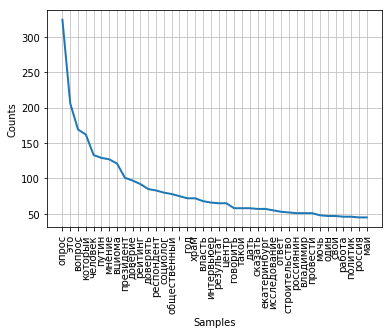

In [45]:
from nltk import FreqDist
freq = FreqDist(normal_forms) 
freq.plot(40, cumulative=False)

In [46]:
lemms = list(set(normal_forms))
print('The number of unique lemmas in', name, ': ', len(lemms)) #число лем - длина набора нормальных форм

The number of unique lemmas in "Sociology2019" :  3162


In [47]:
noun_lemms = [word[0].normal_form for word in dict if (word[0].tag.POS=='NOUN')] #существительные находятся по тегу NOUN
print('The number of unique lemmas in nouns: ', len(set(noun_lemms)))

The number of unique lemmas in nouns:  1359


In [49]:
import numpy as np

In [50]:
set_noun_lemms = list(set(noun_lemms))
noun_occurs = [normal_forms.count(word) for word in set_noun_lemms] #встречаемость каждой леммы сущ в тексте
arr = np.array(noun_occurs)
top_noun_index = arr.argsort()[::-1]
top_noun = set_noun_lemms[top_noun_index[0]] #самое частотное существительное
print('The 1-st place from the most frequent nouns in the text', name, ' is taken by the word "', set_noun_lemms[top_noun_index[0]], '", that is used ', noun_occurs[top_noun_index[0]], ' times')

The 1-st place from the most frequent nouns in the text "Sociology2019"  is taken by the word " опрос ", that is used  324  times


In [51]:
adj_lemms = [word[0].normal_form for word in dict if (word[0].tag.POS=='ADJF' or word[0].tag.POS=='ADJS')] #прилагательные находятся по тегам ADJF и ADJS
print('The number of unique lemmas in adjectives', name, ': ', len(set(adj_lemms)))

The number of unique lemmas in adjectives "Sociology2019" :  550


In [52]:
set_adj_lemms = list(set(adj_lemms))
adj_occurs = [normal_forms.count(word) for word in set_adj_lemms] #встречаемость каждой леммы прил в тексте
arr = np.array(adj_occurs)
top_adj_index = arr.argsort()[::-1]
top_adj = set_adj_lemms[top_adj_index[0]] #самое частотное прилагательное
print('The 1-st place from the most frequent adjectives in the text', name, ' is taken by the word "', set_adj_lemms[top_adj_index[0]], '", that is used ', adj_occurs[top_adj_index[0]], ' times')

The 1-st place from the most frequent adjectives in the text "Sociology2019"  is taken by the word " который ", that is used  162  times


In [53]:
verb_lemms = [word[0].normal_form for word in dict if (word[0].tag.POS=='VERB' or word[0].tag.POS=='INFN')] #глаголы находятся по тегам VERB и INF
print('The number of unique lemmas in verbs', name, ': ', len(set(verb_lemms)))

The number of unique lemmas in verbs "Sociology2019" :  807


In [54]:
set_verb_lemms = list(set(verb_lemms))
verb_occurs = [normal_forms.count(word) for word in set_verb_lemms] #встречаемость каждой леммы глаг в тексте
arr = np.array(verb_occurs)
top_verb_index = arr.argsort()[::-1]
top_verb = set_verb_lemms[top_verb_index[0]] #самый частотный глагол
print('The 1-st place from the most frequent verbs in the text', name, ' is taken by the word "', set_verb_lemms[top_verb_index[0]], '", that is used ', verb_occurs[top_verb_index[0]], ' times')

The 1-st place from the most frequent verbs in the text "Sociology2019"  is taken by the word " доверять ", that is used  85  times


In [ ]:
# Bigrams 

In [56]:
word = "вциома"
tnb = [] #создается и заполняется список слов, образующих биграммы с частотным существительным
for i in range(len(normal_forms)):
    if normal_forms[i] == word:
        tnb.append(normal_forms[i-1])
set_tn = list(set(tnb))
noun_occurs = [tnb.count(word) for word in set_tn] #встречаемость биграммы частотного сущ с каждым из слов, с которыми это частотное слово встречается в тексте
arr_noun = np.array(noun_occurs)
top_noun_index = arr_noun.argsort()[::-1]
s = 1
for i in top_noun_index:
    if noun_occurs[i] > 0:
        print(s,'. ', word, ' + ', set_tn[i], ': ', noun_occurs[i], ' times')
        s += 1

1 .  вциома  +  мнение :  15  times
2 .  вциома  +  опрос :  14  times
3 .  вциома  +  глава :  14  times
4 .  вциома  +  фома :  6  times
5 .  вциома  +  сайт :  4  times
6 .  вциома  +  май :  3  times
7 .  вциома  +  день :  3  times
8 .  вциома  +  директор :  3  times
9 .  вциома  +  гендиректор :  2  times
10 .  вциома  +  политик :  2  times
11 .  вциома  +  социолог :  2  times
12 .  вциома  +  служба :  2  times
13 .  вциома  +  вопрос :  2  times
14 .  вциома  +  росстат :  2  times
15 .  вциома  +  число :  2  times
16 .  вциома  +  провести :  2  times
17 .  вциома  +  есипов :  1  times
18 .  вциома  +  проблема :  1  times
19 .  вциома  +  компания :  1  times
20 .  вциома  +  ремесло :  1  times
21 .  вциома  +  пользоваться :  1  times
22 .  вциома  +  такой :  1  times
23 .  вциома  +  данные :  1  times
24 .  вциома  +  изыскание :  1  times
25 .  вциома  +  президент :  1  times
26 .  вциома  +  дать :  1  times
27 .  вциома  +  интервьюер :  1  times
28 .  вциома  +

In [58]:
word = "фома"
tnb = [] #создается и заполняется список слов, образующих биграммы с частотным существительным
for i in range(len(normal_forms)):
    if normal_forms[i] == word:
        tnb.append(normal_forms[i-1])
set_tn = list(set(tnb))
noun_occurs = [tnb.count(word) for word in set_tn] #встречаемость биграммы частотного сущ с каждым из слов, с которыми это частотное слово встречается в тексте
arr_noun = np.array(noun_occurs)
top_noun_index = arr_noun.argsort()[::-1]
s = 1
for i in top_noun_index:
    if noun_occurs[i] > 0:
        print(s,'. ', word, ' + ', set_tn[i], ': ', noun_occurs[i], ' times')
        s += 1

1 .  фома  +  вциома :  3  times
2 .  фома  +  мнение :  2  times
3 .  фома  +  отличие :  1  times
4 .  фома  +  поэтому :  1  times
5 .  фома  +  ругать :  1  times
6 .  фома  +  анализировать :  1  times
7 .  фома  +  разобраться :  1  times
8 .  фома  +  мочь :  1  times
9 .  фома  +  гораздо :  1  times


In [59]:
word = "левада"
tnb = [] #создается и заполняется список слов, образующих биграммы с частотным существительным
for i in range(len(normal_forms)):
    if normal_forms[i] == word:
        tnb.append(normal_forms[i-1])
set_tn = list(set(tnb))
noun_occurs = [tnb.count(word) for word in set_tn] #встречаемость биграммы частотного сущ с каждым из слов, с которыми это частотное слово встречается в тексте
arr_noun = np.array(noun_occurs)
top_noun_index = arr_noun.argsort()[::-1]
s = 1
for i in top_noun_index:
    if noun_occurs[i] > 0:
        print(s,'. ', word, ' + ', set_tn[i], ': ', noun_occurs[i], ' times')
        s += 1

1 .  левада  +  вциома :  6  times
2 .  левада  +  левинсон :  3  times
3 .  левада  +  аналитика :  2  times
4 .  левада  +  юрий :  2  times
5 .  левада  +  исследование :  2  times
6 .  левада  +  опрос :  2  times
7 .  левада  +  говорить :  1  times
8 .  левада  +  данные :  1  times
9 .  левада  +  агент :  1  times
10 .  левада  +  год :  1  times
11 .  левада  +  пипий :  1  times
12 .  левада  +  вокруг :  1  times
13 .  левада  +  действительность :  1  times
14 .  левада  +  расценка :  1  times
15 .  левада  +  думать :  1  times
16 .  левада  +  компания :  1  times
17 .  левада  +  делать :  1  times
18 .  левада  +  придумать :  1  times
19 .  левада  +  глава :  1  times
20 .  левада  +  представлять :  1  times
21 .  левада  +  независимый :  1  times
22 .  левада  +  хотя :  1  times
23 .  левада  +  президент :  1  times


In [57]:
word = "доверять"
tnb = [] #создается и заполняется список слов, образующих биграммы с прилагательным 
for i in range(len(normal_forms)):
    if normal_forms[i] == word:
        tnb.append(normal_forms[i-1])
        tnb.append(normal_forms[i+1])
set_tn = list(set(tnb))
verb_occurs = [tnb.count(word) for word in set_tn] #встречаемость биграммы частотного сущ с каждым из слов, с которыми это частотное слово встречается в тексте
arr_verb = np.array(verb_occurs)
top_verb_index = arr_verb.argsort()[::-1]
s = 1
for i in top_verb_index:
    if verb_occurs[i] > 3:
        print(s,'. ', word, ' + ', set_tn[i], ': ', verb_occurs[i], ' times')
        s += 1

1 .  доверять  +  доверять :  26  times
2 .  доверять  +  путин :  12  times
3 .  доверять  +  политик :  8  times
4 .  доверять  +  кома :  7  times
5 .  доверять  +  одобрять :  6  times
6 .  доверять  +  россиянин :  5  times
7 .  доверять  +  пожалуйста :  5  times
8 .  доверять  +  респондент :  5  times
9 .  доверять  +  вопрос :  5  times


In [73]:
def tokenizer(normal_forms):
    for elem in set(string.punctuation + '-'):
        if elem in text:
            text = text.replace(elem, ' ')
    return(''.join(word for word in text if not word.isdigit()).lower().split())

In [74]:
freq = nltk.FreqDist(normal_forms) 
for key, val in freq.items(): 
    print (str(key) + ':' + str(val))

снижение:13
поддержка:16
путин:129
ностальгия:1
ссср:3
соцопрос:32
популярный:3
сми:13
доверие:97
среди:10
россиянин:51
падать:17
многие:12
опасаться:5
говорить:58
правда:8
относиться:14
результат:65
доверять:85
социологический:28
опрос:324
вопрос:169
задавать:21
каждый:30
сталкиваться:9
они:8
быть:33
журналист:17
эксперт:5
среднестатистический:1
житель:36
почему:26
совпадать:1
личный:16
ощущение:4
мысль:2
посещать:1
человек:133
люба:8
страна:29
россия:45
ряд:5
особый:1
случай:21
рекордно:2
низкий:7
согласно:17
опубликовать:12
ноябрь:1
год:72
данные:12
всероссийский:19
центр:65
изучение:20
общественный:78
мнение:127
вциома:121
измерять:3
индекс:4
достигнуть:7
уровень:30
снизиться:3
пункт:3
сравнение:1
процент:33
опросить:27
рекорд:1
считать:29
скорее:12
отражать:2
гражданин:19
уверить:3
безусловно:1
хотя:8
большинство:30
прежний:2
выяснить:3
левада:34
четверть:4
избегать:1
социолог:80
положение:3
дело:18
негативный:2
последствие:5
активно:1
обсуждаться:4
президентский:4
выбор:16
особен

сбор:5
персональный:1
анкетирование:1
жёсткий:1
требование:5
издание:2
процедура:8
длительный:3
короткий:1
выполнить:3
предложение:6
напряжённость:1
комар:1
нос:1
подточить:1
злопыхатель:1
ангажировать:2
цитата:2
нтв:1
неизвестно:3
юридический:2
приостановка:2
находиться:6
компетенция:1
застройщик:2
формально:2
нарушать:2
закон:4
пройти:9
слушание:3
разрешение:2
арендовать:1
устроить:1
заявление:3
момент:5
подряд:1
площадка:8
драмтеатр:4
ещё:3
отнестись:2
безразличный:1
определиться:1
репрезентировать:3
ошибка:8
уходить:2
подвесить:1
подготовка:8
затрата:1
усилие:2
направить:1
репрезентативность:9
максимально:3
вместо:4
октябрьский:2
срок:5
подача:4
заявка:3
днём:1
промежуток:1
даваться:2
удобный:1
голосование:15
практика:6
этап:2
екатеринбургский:7
отказать:1
аналогичный:1
отказ:5
регистрация:1
инициативный:2
предположить:2
подпись:2
затем:4
проверять:5
остальной:4
бюрократический:1
составить:9
подать:1
сентябрь:2
противоречивый:3
речь:4
мэр:11
строгий:1
соответствие:4
устав:3
сесть:1

материальный:3
стимул:1
плат:1
приятно:1
мобилизовать:1
фсо:6
полстер:2
отличие:3
расположить:2
поквартирный:2
привлечение:1
административный:1
заключаться:2
ругать:1
скандал:4
огромный:4
подарок:2
фэсэошник:1
лишить:1
причём:1
искусственно:2
сидеть:2
парочка:1
погоны:1
вынудить:1
совершать:1
исполнять:1
квалификация:2
ответственный:1
губернаторов:1
отсутствовать:1
обратный:2
опасность:1
чрезмерный:1
выноситься:1
вынести:1
однозначно:1
сигнал:2
кавычка:1
цивилизовать:1
произноситься:1
проговаривать:2
претензия:5
кулуар:1
стучать:1
кулак:1
стол:2
кабинет:2
заинтересовать:1
измеритель:1
расшифровывать:1
аббревиатура:1
исправление:1
возможно:1
понятно:2
распределение:1
одновременно:4
вдобавок:1
безопасный:1
побаиваться:1
угадать:1
еженедельно:1
колебаться:2
значение:3
ю:1
телеразговор:1
вертикаль:1
старт:2
массировать:1
производиться:1
содержание:2
прямой:1
закончить:1
ссылаться:1
приняться:1
меньший:1
заставлять:1
угадывать:1
разрыв:1
нарушить:1
научно:1
обоснованный:1
представляться:1
т

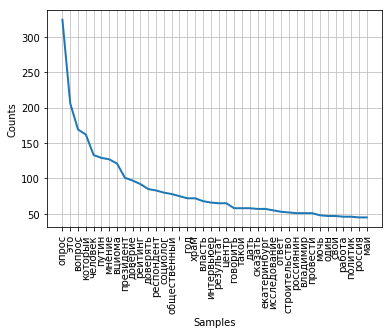

In [75]:
freq = FreqDist(normal_forms) 
freq.plot(40, cumulative=False)

In [ ]:
# How to remove the character "-"? 

In [76]:
bigrams = {word: [] for word in set(normal_forms)} 

In [77]:
for i in range(len(normal_forms)-1): #проходимся по всему списку слов normal_forms (до последнего элемента)
    bigrams[normal_forms[i]].append(normal_forms[i+1]) #добавляем в список биграмм для i-го слова i+1-ое слово

print(bigrams)

{'составлять': ['прошлый', 'отмечаться', 'анекдот', 'труд', 'менее'], 'подделать': ['анкета'], 'многие': ['опасаться', 'бояться', 'вопрос', 'респондент', 'общественный', 'общественный', 'протестовать', 'горожанин', 'екатеринбуржец', 'это', 'думать', 'отмечать'], 'thomas': ['petersen'], 'прийтись': ['платить'], 'кейс': ['мой'], 'алленсбах': ['описывать', 'кто', 'искажение'], 'юродствовать': ['врать'], 'иметь': ['социологический', 'право', 'право', 'отношение', 'последствие', 'возможность', 'дело', 'дело', 'никакой', 'никакой', 'точка', 'проявление', 'опыт', 'вид', 'длительный', 'высокий', 'гораздо', 'право', 'дело', 'привилегированный', 'определённый'], 'поговорить': ['нормальный', 'газета', 'директор', 'фёдоров', 'заведовать', 'несколько'], 'ставить': ['вопрос', 'вопрос', 'выше'], 'прорваться': ['защитный'], 'хулиганство': ['составить'], 'мирок': ['свобода'], 'обнародовать': ['пятница', 'пятница'], 'ненавистный': ['мы'], 'частенько': ['удивлять'], 'муниципальный': ['депутат'], 'лицо': 

In [78]:
E = {}
for i,a in enumerate(bigrams):
    S = bigrams[a]; S.sort()
    T = {}; c = S[0]; n = 0
    for z in S:
        if z == c: n = n+1
        else: T[c] = n; c = z; n = 1
    T[c] = n
    print(str(i+1),a,T)
    E[a] = [i+1,T]

1 составлять {'анекдот': 1, 'менее': 1, 'отмечаться': 1, 'прошлый': 1, 'труд': 1}
2 подделать {'анкета': 1}
3 многие {'бояться': 1, 'вопрос': 1, 'горожанин': 1, 'думать': 1, 'екатеринбуржец': 1, 'общественный': 2, 'опасаться': 1, 'отмечать': 1, 'протестовать': 1, 'респондент': 1, 'это': 1}
4 thomas {'petersen': 1}
5 прийтись {'платить': 1}
6 кейс {'мой': 1}
7 алленсбах {'искажение': 1, 'кто': 1, 'описывать': 1}
8 юродствовать {'врать': 1}
9 иметь {'вид': 1, 'возможность': 1, 'высокий': 1, 'гораздо': 1, 'дело': 3, 'длительный': 1, 'никакой': 2, 'определённый': 1, 'опыт': 1, 'отношение': 1, 'последствие': 1, 'право': 3, 'привилегированный': 1, 'проявление': 1, 'социологический': 1, 'точка': 1}
10 поговорить {'газета': 1, 'директор': 1, 'заведовать': 1, 'несколько': 1, 'нормальный': 1, 'фёдоров': 1}
11 ставить {'вопрос': 2, 'выше': 1}
12 прорваться {'защитный': 1}
13 хулиганство {'составить': 1}
14 мирок {'свобода': 1}
15 обнародовать {'пятница': 2}
16 ненавистный {'мы': 1}
17 частенько {

333 отражать {'мнение': 1, 'общественный': 1}
334 прошить {'различие': 2}
335 сутки {'подняться': 1}
336 год {'впоследствии': 1, 'всероссийский': 1, 'выдавать': 1, 'вырасти': 1, 'выявить': 1, 'глава': 1, 'данные': 1, 'деньга': 1, 'деятельность': 1, 'ежедневный': 1, 'екатеринбургский': 1, 'женщина': 1, 'жизнь': 1, 'житель': 2, 'задавать': 1, 'заниматься': 1, 'западногерманский': 1, 'заявить': 1, 'знать': 1, 'конец': 1, 'который': 1, 'кремль': 1, 'левада': 1, 'май': 2, 'методика': 1, 'мужчина': 1, 'назад': 5, 'обследование': 1, 'общественный': 1, 'один': 1, 'особенно': 1, 'писать': 2, 'подвесить': 1, 'предлагаться': 2, 'проводиться': 1, 'процент': 3, 'путин': 1, 'работа': 1, 'работать': 1, 'ранее': 1, 'режим': 1, 'рейтинг': 1, 'респондент': 1, 'решение': 1, 'россия': 1, 'россиянин': 1, 'смешаться': 1, 'согласно': 1, 'социолог': 2, 'специально': 1, 'становиться': 1, 'старший': 1, 'считать': 1, 'утверждаться': 1, 'цифра': 1, 'это': 1, 'январь': 1, '–': 3}
337 политизировать {'часто': 1}
33

500 отчёт {'важный': 1, 'попасть': 1, 'пресс': 1}
501 лишить {'причём': 1}
502 проф­союз {'чаща': 1}
503 голосовать {'выражать': 1, 'меньшинство': 1, 'процент': 1, 'прошлое': 1, 'форма': 1}
504 вид {'интервьюер': 1, 'который': 1, 'опрос': 1, 'открытый': 1, 'фраза': 1, 'это': 2}
505 мнение {'александр': 1, 'алленсбах': 1, 'безопасно': 1, 'большинство': 3, 'вопрос': 2, 'вциома': 15, 'высказать': 1, 'говорить': 1, 'горожанин': 3, 'гражданин': 1, 'должный': 2, 'дополнить': 1, 'другой': 1, 'житель': 3, 'зависимость': 1, 'замерять': 1, 'идти': 1, 'конструироваться': 2, 'который': 5, 'личный': 1, 'меньшинство': 1, 'местный': 3, 'мнение': 2, 'многие': 1, 'молчаливый': 1, 'мочь': 1, 'наверное': 1, 'насколько': 1, 'немецкий': 1, 'нужно': 1, 'обосновать': 1, 'обсуждаться': 1, 'общественный': 1, 'однако': 1, 'оказаться': 1, 'оно': 4, 'определённый': 1, 'опрос': 2, 'опросный': 1, 'относиться': 1, 'официальный': 1, 'парламентарий': 1, 'повод': 1, 'попросту': 1, 'поэтому': 1, 'предлагать': 1, 'предст

666 максимально {'законный': 1, 'корректный': 1, 'полезный': 1}
667 президентский {'выбор': 2, 'рейтинг': 1, 'труд': 1}
668 политический {'взгляд': 1, 'вопрос': 1, 'жизнь': 1, 'задача': 1, 'инструмент': 1, 'консультант': 1, 'конъюнктура': 1, 'лидер': 1, 'манипуляция': 1, 'менеджер': 1, 'очки': 1, 'персона': 1, 'повестка': 1, 'позиция': 2, 'преференция': 1, 'процесс': 1, 'сфера': 1, 'теоретик': 1, 'теория': 3}
669 регулярно {'выполнять': 1, 'дать': 1, 'просить': 1}
670 первое {'исследование': 1, 'направление': 1}
671 проживание {'возраст': 1}
672 врач {'прочий': 1}
673 прима {'t': 1}
674 разогнаться {'мнение': 1}
675 шаг {'тот': 1}
676 драма {'акция': 1, 'ближний': 1, 'власть': 1, 'высказываться': 1, 'перечень': 1, 'призвать': 1, 'против': 1, 'центр': 3}
677 продукция {'свой': 1}
678 специализироваться {'разговор': 1}
679 эпистемологический {'постановка': 1}
680 обрабатывать {'кодировать': 1}
681 gallup {'world': 1, 'каждый': 1, 'прошлое': 1}
682 особенно {'востребовать': 1, 'заказчик':

833 курировать {'контролировать': 1}
834 трансформация {'конструироваться': 1}
835 налогоплательщик {'почему': 1}
836 репрезентативность {'выборка': 3, 'говорить': 1, 'максимально': 1, 'основать': 1, 'поэтому': 1, 'сколько': 1, 'улица': 1}
837 смочь {'activity': 1, 'добиться': 1, 'конкурировать': 1, 'познакомиться': 1, 'поучаствовать': 1, 'принять': 1, 'узнать': 1}
838 держаться {'повторять': 1}
839 считать {'вариант': 1, 'ваш': 1, 'вероника': 1, 'глава': 1, 'главное': 1, 'давление': 1, 'день': 1, 'категорически': 1, 'курс': 1, 'начинать': 1, 'нель': 1, 'ноэль': 1, 'петерсный': 1, 'правильный': 2, 'провести': 1, 'профсоюз': 2, 'результат': 1, 'самый': 1, 'свой': 1, 'социолог': 2, 'социология': 1, 'стать': 1, 'хороший': 1, 'эксперт': 1, 'это': 2}
840 подняться {'буря': 1, 'объяснение': 1, 'это': 1}
841 главное {'выбор': 1, 'показатель': 1, 'это': 1}
842 целое {'варьироваться': 1, 'выступать': 1, 'картина': 1, 'контроль': 1, 'одобрять': 1, 'опубликовать': 1, 'относиться': 1, 'отношение':

999 установить {'именно': 1, 'новое': 1}
1000 подавлять {'большинство': 2}
1001 понедельник {'губернатор': 1, 'май': 1, 'опубликовать': 1, 'стройплощадка': 1}
1002 смеяться {'вариант': 1, 'положить': 1, 'ходить': 1, 'юродствовать': 1}
1003 аббревиатура {'всероссийский': 1}
1004 сын {'подытожить': 1, 'полковник': 1}
1005 религиозный {'сооружение': 1}
1006 посторонний {'наш': 1}
1007 стандартный {'опрос': 1}
1008 мироустройство {'неудачный': 1}
1009 иметься {'вид': 2, 'вопрос': 1}
1010 участник {'один': 1, 'опрос': 8, 'протест': 2}
1011 представить {'владимир': 1, 'вместо': 1, 'дать': 1, 'здравомыслящий': 1, 'результат': 1, 'серьёзный': 1, 'справедливый': 1, 'такой': 1}
1012 число {'боязнь': 1, 'вциома': 2, 'выборка': 1, 'екатеринбуржец': 1, 'ответ': 2, 'тот': 1, 'уважаемый': 1}
1013 положить {'зачитывать': 1, 'предложить': 1, 'смысл': 1}
1014 отдел {'один': 1, 'организация': 1, 'полиция': 1}
1015 контроль {'интервью': 1, 'результат': 1, 'серьёзный': 1, 'социологический': 1, 'формулировк

1166 бессмысленный {'трата': 1}
1167 вставлять {'список': 1}
1168 качественно {'год': 1}
1169 заготовить {'вариант': 2}
1170 продемонстрировать {'сеанс': 1}
1171 болгарка {'прошлый': 1}
1172 европа {'приём': 1}
1173 нынешний {'настроение': 1, 'руководитель': 1}
1174 анекдот {'например': 1, 'сын': 1}
1175 методический {'аудит': 1, 'гибкость': 1, 'информация': 2, 'культура': 1, 'ловушка': 1, 'принцип': 1}
1176 общественный {'важность': 1, 'вопрос': 2, 'деятель': 1, 'дискуссия': 4, 'изоляция': 1, 'контроль': 1, 'мнение': 57, 'настроение': 1, 'организация': 2, 'палата': 2, 'резонанс': 1, 'связь': 1, 'служба': 1, 'слушание': 2, 'согласие': 1}
1177 качественный {'измениться': 1, 'исследование': 2, 'неполитизировать': 1, 'опрос': 1, 'отдел': 1, 'отличаться': 1}
1178 решающий {'вопрос': 1, 'готовить': 1, 'роль': 1}
1179 допускаться {'рассказать': 1}
1180 пускать {'чужое': 1}
1181 разрешить {'помощь': 2}
1182 разбирать {'манипуляция': 1}
1183 юрист {'который': 1}
1184 обязательно {'рыба': 1}
11

1332 окончательно {'перейти': 1}
1333 восстановление {'помочь': 1}
1334 запуск {'проект': 1}
1335 исполнительный {'власть': 1, 'директор': 1}
1336 подумать {'страна': 1}
1337 уверить {'измениться': 1, 'нель': 1, 'опрос': 1}
1338 незнакомец {'думать': 1, 'очень': 1}
1339 пипий {'левада': 1, 'скрывать': 1}
1340 выигрывать {'проводить': 3, 'тот': 1}
1341 вокруг {'идея': 1, 'левада': 1, 'нормальный': 1, 'сквер': 1, 'строительство': 2}
1342 сложный {'анализ': 2}
1343 военный {'хунта': 1}
1344 глупый {'обезоруживать': 1}
1345 отметка {'впервые': 1}
1346 принципиально {'тип': 1}
1347 пожаловаться {'избиение': 1}
1348 нормальный {'кампания': 1, 'общественный': 2, 'переговоры': 1, 'поговорить': 2, 'практика': 2, 'референдум': 1, 'согласовать': 1, 'цена': 1, 'человек': 1, 'шаг': 1}
1349 лично {'пиночет': 1, 'принимать': 1}
1350 неизвестно {'какой': 1, 'кто': 1, 'мэрия': 1}
1351 инициатор {'массовый': 1, 'проект': 1}
1352 завершение {'острый': 1}
1353 том {'далее': 3}
1354 инфотейнмент {'серьёзны

1499 исключить {'сквер': 1}
1500 культовый {'книга': 1}
1501 идея {'власть': 1, 'голосование': 1, 'заморозить': 1, 'нужный': 1, 'репрезентативный': 1, 'респондент': 1, 'установка': 1}
1502 неправдивый {'ответ': 1}
1503 измерительный {'класс': 1}
1504 соответственно {'единственный': 1, 'никакой': 1, 'человек': 1}
1505 предстоящий {'разговор': 1}
1506 насколько {'велик': 1, 'информация': 1, 'сборщик': 1}
1507 возможно {'любой': 1}
1508 сконструировать {'изучать': 1}
1509 никто {'ведомый': 1, 'видимый': 1, 'доверять': 1, 'запретить': 1, 'контролировать': 2, 'любить': 1, 'никто': 1, 'объяснить': 1, 'позволить': 1, 'пытаться': 1, 'репрессировать': 1, 'сказать': 1, 'хотеть': 1}
1510 портить {'рейтинг': 1}
1511 жёсткий {'требование': 1}
1512 ранее {'sknews': 1, 'глава': 1, 'задавать': 1, 'кремль': 1, 'май': 1, 'москва': 1, 'неоднократно': 1, 'ограничиваться': 1, 'озвучить': 1, 'опрос': 1, 'открытый': 1, 'призвать': 1, 'проводиться': 1, 'респондент': 2, 'российский': 1, 'сми': 1, 'сообщать': 1

1665 задание {'алексей': 1, 'выполнить': 1, 'далёкий': 1, 'опрос': 1, 'рассматривать': 1}
1666 победа {'новость': 1}
1667 пора {'накануне': 1}
1668 стабильный {'зависеть': 1}
1669 трата {'деньга': 1}
1670 отразить {'речевой': 1}
1671 быстро {'вычисляться': 1, 'говорить': 1, 'качественно': 1, 'наш': 1, 'определяться': 1, 'понравиться': 1, 'превратить': 1, 'узнать': 1}
1672 служба {'вторичный': 1, 'вциома': 2, 'вырасти': 1, 'государственный': 1, 'готовиться': 1, 'доверие': 1, 'новость': 1, 'опрос': 1, 'охрана': 1, 'политтехнолог': 1, 'получить': 1, 'профессиональный': 1, 'сильно': 1, 'сколько': 1}
1673 уклончивый {'ответ': 1}
1674 прекрасно {'жить': 1}
1675 место {'анкета': 1, 'будущий': 1, 'городской': 1, 'заслать': 1, 'идея': 1, 'мамочка': 2, 'находиться': 1, 'неудачный': 1, 'один': 1, 'опрос': 1, 'проведение': 2, 'проживание': 1, 'профсоюз': 1, 'путин': 1, 'работа': 1, 'размещение': 1, 'районный': 1, 'реализация': 1, 'сквер': 11, 'собор': 1, 'строительство': 6, 'храм': 1}
1676 внутрен

1832 морозильный {'камера': 1}
1833 начало {'вокруг': 1, 'год': 1, 'июль': 1}
1834 пожилое {'умирать': 1}
1835 ошибочно {'наука': 1}
1836 партнёр {'давать': 1, 'интервьюер': 1, 'сохранить': 1}
1837 статистический {'отклонение': 1, 'работа': 1, 'технология': 1}
1838 правительство {'готовый': 1, 'довольный': 1, 'заказывать': 1, 'медведев': 1, 'положительно': 1, 'свой': 1}
1839 сидеть {'парочка': 1, 'письменный': 1}
1840 америка {'гораздо': 1, 'реально': 1}
1841 деятельность {'госдума': 1, 'институт': 2, 'президент': 4, 'путин': 6, 'социолог': 1, 'соцопрос': 1}
1842 фракция {'лдпр': 2}
1843 мы {'америка': 1, 'весь': 1, 'выясниться': 1, 'доверять': 1, 'каков': 1, 'нужный': 1, 'перспектива': 1, 'помогать': 1, 'понимать': 1, 'предлагать': 2, 'предстоять': 1, 'рассказать': 1, 'свой': 1, 'хватать': 1, 'хотеться': 1}
1844 интерфакс {'ждать': 1, 'комментировать': 1, 'ответ': 1, 'ранее': 1, 'уточнить': 1, 'четверг': 1}
1845 конференц {'колл': 3}
1846 личный {'встреча': 1, 'дать': 1, 'интервью': 2

1998 копошиться {'улица': 1}
1999 правда {'высказать': 1, 'карл': 1, 'относиться': 1, 'предыдущий': 1, 'причина': 1, 'смотреть': 1, 'том': 1, 'человек': 1}
2000 оценка {'вциома': 1, 'доверие': 1, 'работа': 1, 'эффективность': 1}
2001 экзамен {'быть': 1, 'выдать': 1}
2002 апрель {'путин': 1, 'сообщаться': 1}
2003 вынести {'публичный': 1}
2004 c {'январь': 1}
2005 имитироваться {'проваливаться': 1}
2006 приложение {'операционный': 1}
2007 образование {'степень': 1}
2008 двести {'тысяча': 1}
2009 враньё {'тот': 1}
2010 благотворитель {'восстановить': 1}
2011 центр {'валерий': 1, 'вциома': 1, 'город': 7, 'де': 1, 'деятельность': 1, 'другой': 1, 'екатеринбург': 2, 'изучение': 14, 'интересовать': 1, 'исправление': 1, 'исследование': 2, 'карина': 1, 'который': 1, 'лев': 1, 'лишь': 1, 'методология': 2, 'набраться': 1, 'наоборот': 1, 'неправительственный': 1, 'обнаружить': 1, 'объяснять': 1, 'ошибка': 1, 'поддержка': 1, 'показывать': 1, 'получать': 1, 'появиться': 1, 'разный': 1, 'решить': 1, '

2165 оказаться {'общественный': 1, 'равно': 1, 'россиянин': 1, 'спецслужба': 1, 'тот': 1}
2166 начинаться {'конфликт': 2, 'общественный': 1, 'обычный': 1}
2167 добить {'рейтинг': 1}
2168 сыграть {'решающий': 1}
2169 килограмм {'крупа': 1}
2170 подтвердиться {'екатеринбургский': 1}
2171 подробно {'разбирать': 1}
2172 корреспондент {'федеральный': 1}
2173 цитата {'нтв': 1, 'уходить': 1}
2174 идеология {'человек': 1}
2175 справляться {'власть': 1, 'задача': 1}
2176 расход {'сколько': 1}
2177 любой {'дать': 1, 'плебисцит': 1, 'плебисцитарный': 1, 'практика': 1, 'разговор': 3, 'случай': 2, 'событие': 1, 'сокрытие': 1, 'число': 2}
2178 благосостояние {'будущее': 1, 'оправдаться': 2}
2179 заксобрание {'понедельник': 1}
2180 технический {'причина': 1, 'проблема': 1}
2181 связывать {'усердность': 1}
2182 согласный {'изменить': 1, 'переименовать': 1}
2183 мобилизовать {'поучаствовать': 1}
2184 обстоятельство {'опрос': 1, 'позволять': 1}
2185 отмечаться {'вциома': 1, 'год': 1, 'личный': 1, 'увере

2331 идеал {'должный': 1}
2332 даваться {'выбор': 1, 'символический': 1}
2333 подбирать {'вариант': 4}
2334 прохожий {'планшетный': 1, 'целое': 1}
2335 камера {'журналист': 1}
2336 недостаток {'российский': 1}
2337 наоборот {'независимый': 1, 'расти': 2, 'упасть': 1, 'участвовать': 1}
2338 связь {'жёсткий': 1, 'народ': 1, 'опасность': 1, 'план': 1, 'последний': 1, 'пояснить': 1, 'сельский': 1, 'слабый': 1}
2339 месседж {'который': 1}
2340 объявить {'сбор': 1, 'стройка': 1, 'январь': 1}
2341 иса {'рана': 1}
2342 сквер {'администрация': 1, 'возле': 1, 'глава': 1, 'градоначальник': 1, 'должный': 1, 'драмтеатр': 1, 'екатеринбург': 1, 'иметь': 1, 'какой': 1, 'несколько': 1, 'октябрьский': 1, 'показывать': 1, 'поскольку': 1, 'появиться': 1, 'президент': 1, 'прийти': 1, 'ради': 1, 'разбить': 2, 'разрешение': 1, 'решаться': 2, 'ряд': 1, 'сообщать': 1, 'спустя': 1, 'стать': 1, 'считать': 1, 'театр': 8, 'храм': 1, 'центр': 3, 'это': 2}
2343 классический {'исследователь': 1, 'представление': 1}
2

2498 муравей {'который': 1}
2499 приказать {'это': 1}
2500 регистрация {'инициативный': 1}
2501 смех {'удивление': 1}
2502 вырасти {'всероссийский': 1, 'интерес': 1, 'протяжение': 1, 'процент': 1, 'раз': 2}
2503 вычислять {'заключить': 1}
2504 банально {'респондент': 1}
2505 похожий {'анкета': 1, 'претензия': 1}
2506 главный {'заказчик': 1, 'претензия': 1, 'привести': 1, 'принцип': 3, 'редактор': 1, 'серьёзный': 1, 'собор': 1, 'уловка': 1, 'установка': 1, 'хитрость': 2}
2507 парочка {'человек': 1}
2508 уточнить {'быть': 1, 'конкретный': 1, 'низкий': 1, 'опрос': 1, 'падать': 1, 'свой': 1, 'ситуация': 1, 'согласно': 1, 'форма': 1}
2509 фейсбук {'написать': 1}
2510 снизиться {'минимум': 2, 'пункт': 1}
2511 таковой {'георг': 1}
2512 вечер {'заполнить': 1}
2513 прямая {'ассоциация': 1, 'вопрос': 7, 'линия': 3}
2514 весной {'год': 1}
2515 локальный {'снижение': 1}
2516 выбор {'ближний': 1, 'вообще': 1, 'год': 1, 'конкретный': 1, 'который': 1, 'мэр': 1, 'оставлять': 1, 'ответ': 1, 'площадка':

2664 заявка {'днём': 1, 'подать': 1, 'случай': 1}
2665 сергей {'миронов': 6, 'цыпляев': 1}
2666 строиться {'выборочный': 1, 'основа': 1, 'согласие': 1}
2667 страна {'бояться': 1, 'бывший': 1, 'взглянуть': 1, 'задача': 1, 'заявить': 2, 'иосиф': 1, 'космос': 1, 'кто': 1, 'мир': 1, 'настолько': 1, 'невиданный': 1, 'независимый': 1, 'опасаться': 1, 'песок': 1, 'плохо': 1, 'полный': 1, 'появление': 1, 'произойти': 1, 'разработать': 1, 'регион': 1, 'рейтинг': 1, 'россия': 1, 'самый': 1, 'считать': 1, 'увеличиваться': 1, 'участник': 1, 'хороший': 1, 'это': 1}
2668 суббота {'журналист': 1}
2669 публицист {'александр': 1}
2670 растеряться {'интервьюер': 1}
2671 заведомо {'лишать': 1, 'обрекать': 1}
2672 левый {'захотеть': 1}
2673 далеко {'везде': 1, 'гораздо': 1, 'идти': 1, 'предел': 1, 'самый': 1}
2674 ходить {'кино': 1, 'улица': 1}
2675 прилегать {'новый': 1}
2676 штатский {'кстати': 1}
2677 интеллект {'два': 1}
2678 предоставлять {'свой': 1, 'такой': 1}
2679 подход {'выявление': 1, 'опрос': 

2831 курс {'государство': 1}
2832 мэр {'высокинский': 1, 'город': 2, 'екатеринбург': 4, 'москва': 1, 'начать': 1, 'сказать': 1, 'упомянуть': 1}
2833 восприниматься {'безопасный': 1, 'инструмент': 1, 'информация': 1, 'опрос': 1, 'правильный': 1, 'сильный': 1, 'сквозь': 1}
2834 гораздо {'власть': 1, 'интенсивный': 1, 'маленький': 1, 'один': 1, 'фома': 1, 'чаща': 1, 'экспертиза': 1}
2835 усилиться {'связь': 1}
2836 давление {'власть': 1, 'заказчик': 2, 'определяться': 1, 'россиянин': 1, 'это': 1}
2837 опрос {'активно': 1, 'ангажировать': 1, 'анонимный': 1, 'базироваться': 1, 'безопасно': 1, 'безусловно': 1, 'бесстрастный': 1, 'больший': 1, 'большинство': 1, 'бомбить': 1, 'бросать': 1, 'быть': 3, 'важный': 1, 'вероника': 1, 'вопрос': 2, 'воспринимать': 1, 'воспринять': 2, 'всероссийский': 2, 'вциома': 14, 'выглядеть': 1, 'вызывать': 1, 'высветить': 1, 'выходить': 1, 'гендиректор': 1, 'глубинный': 1, 'говорить': 1, 'говорят': 2, 'город': 1, 'горожанин': 1, 'гражданин': 5, 'даваться': 1, 'дв

2997 шерин {'парламентарий': 1, 'предложить': 1, 'слово': 1}
2998 фраза {'важный': 1}
2999 предложный {'власть': 1}
3000 точно {'говорить': 1, 'депутат': 1, 'опрос': 1}
3001 бесстрастный {'показывать': 1}
3002 взгляд {'аргумент': 1, 'ждать': 1, 'использовать': 1, 'никакой': 1, 'предложить': 1, 'слово': 1}
3003 подозрение {'достоверность': 1}
3004 четыре {'глава': 1, 'год': 1, 'принцип': 1}
3005 майский {'опрос': 1, 'указ': 1}
3006 выяснить {'вциома': 1, 'выступать': 1, 'год': 1}
3007 масса {'извращенец': 1}
3008 рамка {'опрос': 1, 'предварительный': 1, 'соцопрос': 1, 'февральский': 1}
3009 конкурировать {'мировой': 1}
3010 обладать {'больший': 1, 'избирательный': 1, 'какой': 1, 'квалификация': 1, 'репрезентативность': 1, 'серьёзный': 1}
3011 судить {'общественный': 1, 'отдельный': 1, 'тот': 1}
3012 объём {'нагнать': 1}
3013 прекращение {'строительство': 1}
3014 менеджер {'проворачивать': 1, 'продажа': 1}
3015 сеть {'расходиться': 1}
3016 запад {'также': 1}
3017 механизм {'который': 1, 

In [79]:
net = open("pajek.net", "w")
n = len(E)
net.write('{0}{1}\n'.format('*vertices ',n))
for i,a in enumerate(E):
    net.write('{0} "{1}"\n'.format(E[a][0], a))
net.write("*arcs\n")
for a in E:
    i = E[a][0]
    for b in E[a][1]:
        j = E[b][0]; k = E[a][1][b]
        net.write('{0} {1} {2}\n'.format(i,j,k))
net.close()

In [ ]:
# Other way 

In [80]:
E = {}
for i,a in enumerate(bigrams):  
  S = sorted(bigrams[a]); T = {}
  if S:
    c = S[0]; n = 0
    for z in S:
      if z == c: n = n+1
      else: T[c] = n; c = z; n = 1
    T[c] = n;
  E[a] = [i+1,T]
print(i+1,a,T)

3162 летие {'екатеринбург': 1}


In [81]:
net = open("pajek.net", "w")
net.write('*vertices {0}\n'.format(len(E)))
for i,a in enumerate(E): net.write('{0} "{1}"\n'.format(E[a][0],a))
net.write("*arcs\n")
for a in E:
  for b in E[a][1]:
    net.write('{0} {1} {2}\n'.format(E[a][0],E[b][0],E[a][1][b]))
net.close()

In [ ]:
# TF index 

In [83]:
import collections
def tf(text):
    tf_text = collections.Counter(normal_forms)
    for i in tf_text:
        tf_text[i] = tf_text[i]/float(len(normal_forms))
    return tf_text

print(tf(text))

Counter({'опрос': 0.022720897615708276, 'это': 0.014446002805049088, 'вопрос': 0.01185133239831697, 'который': 0.011360448807854138, 'человек': 0.00932678821879383, 'путин': 0.009046283309957924, 'мнение': 0.008906030855539973, 'вциома': 0.008485273492286114, 'президент': 0.007082748948106592, 'доверие': 0.006802244039270687, 'рейтинг': 0.0064516129032258064, 'доверять': 0.005960729312762973, 'респондент': 0.005820476858345021, 'социолог': 0.005610098176718092, 'общественный': 0.00546984572230014, '–': 0.005259467040673212, 'год': 0.005049088359046283, 'храм': 0.005049088359046283, 'власть': 0.004768583450210378, 'интервьюер': 0.004628330995792427, 'результат': 0.00455820476858345, 'центр': 0.00455820476858345, 'говорить': 0.004067321178120617, 'такой': 0.004067321178120617, 'дать': 0.004067321178120617, 'сказать': 0.003997194950911641, 'екатеринбург': 0.003997194950911641, 'исследование': 0.0038569424964936885, 'ответ': 0.0037166900420757365, 'строительство': 0.0036465638148667602, 'р

In [84]:
freq = nltk.FreqDist(tf(text)) 
for key, val in freq.items(): 
    print (str(key) + ':' + str(val))

снижение:0.0009116409537166901
поддержка:0.0011220196353436186
путин:0.009046283309957924
ностальгия:7.012622720897616e-05
ссср:0.00021037868162692848
соцопрос:0.002244039270687237
популярный:0.00021037868162692848
сми:0.0009116409537166901
доверие:0.006802244039270687
среди:0.0007012622720897616
россиянин:0.003576437587657784
падать:0.0011921458625525946
многие:0.0008415147265077139
опасаться:0.0003506311360448808
говорить:0.004067321178120617
правда:0.0005610098176718093
относиться:0.0009817671809256663
результат:0.00455820476858345
доверять:0.005960729312762973
социологический:0.0019635343618513326
опрос:0.022720897615708276
вопрос:0.01185133239831697
задавать:0.0014726507713884993
каждый:0.0021037868162692847
сталкиваться:0.0006311360448807854
они:0.0005610098176718093
быть:0.0023141654978962134
журналист:0.0011921458625525946
эксперт:0.0003506311360448808
среднестатистический:7.012622720897616e-05
житель:0.0025245441795231417
почему:0.0018232819074333801
совпадать:7.01262272089761

подтверждать:0.00014025245441795232
статус:0.00028050490883590464
спокойно:7.012622720897616e-05
показаться:0.00014025245441795232
профан:7.012622720897616e-05
итак:7.012622720897616e-05
никакой:0.0011921458625525946
восприниматься:0.0004908835904628332
что:7.012622720897616e-05
либо:0.0007713884992987377
пытаться:0.0008415147265077139
расколоть:0.00014025245441795232
держаться:7.012622720897616e-05
повторять:7.012622720897616e-05
общепринятый:7.012622720897616e-05
клише:7.012622720897616e-05
выдавать:0.00014025245441795232
твой:7.012622720897616e-05
ждать:0.0007713884992987377
предлагать:0.0007012622720897616
вариант:0.002805049088359046
правильный:0.0004908835904628332
экзамен:0.00014025245441795232
запутать:0.00014025245441795232
сбить:7.012622720897616e-05
поддаваться:0.00014025245441795232
завалить:7.012622720897616e-05
выдать:0.00021037868162692848
соответственно:0.00021037868162692848
единственный:0.0003506311360448808
обсуждать:0.00028050490883590464
сподвигнуть:7.0126227208976

ясно:0.00014025245441795232
разбить:0.00014025245441795232
мамочка:0.00021037868162692848
коляска:0.00014025245441795232
погулять:0.00014025245441795232
заказчик:0.0009817671809256663
грустно:0.00014025245441795232
произойти:0.0005610098176718093
разрешить:0.00014025245441795232
вмиг:7.012622720897616e-05
обсуждение:0.00028050490883590464
течение:0.0004908835904628332
подсчёт:0.00021037868162692848
отчитываться:0.00014025245441795232
мутный:7.012622720897616e-05
чей:7.012622720897616e-05
контракт:0.00014025245441795232
заставить:0.00014025245441795232
высокомерный:7.012622720897616e-05
переговоры:0.00021037868162692848
откатить:7.012622720897616e-05
впечатлять:7.012622720897616e-05
заморочить:7.012622720897616e-05
голова:0.00021037868162692848
получиться:0.00028050490883590464
прорабатывать:7.012622720897616e-05
гд:7.012622720897616e-05
компромисс:0.00014025245441795232
возможный:0.0003506311360448808
делаться:0.00014025245441795232
законный:7.012622720897616e-05
уточняться:7.012622720

кризис:0.00021037868162692848
закончиться:0.00014025245441795232
увеличиваться:0.00021037868162692848
надежда:0.00014025245441795232
оправдаться:0.00014025245441795232
негативно:0.00028050490883590464
влиять:0.0003506311360448808
разъяснить:7.012622720897616e-05
применять:0.00014025245441795232
прямо:0.00028050490883590464
отечественный:0.00014025245441795232
фамилия:0.00028050490883590464
составлять:0.0003506311360448808
недовольство:0.00014025245441795232
коррелировать:0.00021037868162692848
сведение:0.00014025245441795232
содержаться:7.012622720897616e-05
премьер:7.012622720897616e-05
министр:7.012622720897616e-05
коммунист:7.012622720897616e-05
потребовать:0.00021037868162692848
c:7.012622720897616e-05
низок:7.012622720897616e-05
вторичный:0.00014025245441795232
тасс:7.012622720897616e-05
лично:0.00014025245441795232
ошибаться:7.012622720897616e-05
отслеживать:7.012622720897616e-05
противоречить:7.012622720897616e-05
ценить:7.012622720897616e-05
профессионализм:7.012622720897616e-0

решиться:7.012622720897616e-05
парадоксальный:7.012622720897616e-05
оппозиционный:7.012622720897616e-05
реж:0.00014025245441795232
оппозиция:7.012622720897616e-05
зачастую:0.00014025245441795232
кит:7.012622720897616e-05
росстат:0.0004908835904628332
исполнительный:0.00014025245441795232
исключительно:7.012622720897616e-05
фактический:7.012622720897616e-05
расход:7.012622720897616e-05
корова:7.012622720897616e-05
долг:7.012622720897616e-05
болезнь:7.012622720897616e-05
интересовать:0.00014025245441795232
духовный:7.012622720897616e-05
присвоить:7.012622720897616e-05
иностранный:0.00014025245441795232
агент:0.00021037868162692848
зарубежный:7.012622720897616e-05
грант:7.012622720897616e-05
собственность:7.012622720897616e-05
организационный:7.012622720897616e-05
одинаковый:7.012622720897616e-05
очно:7.012622720897616e-05
истинный:7.012622720897616e-05
придумать:7.012622720897616e-05
направление:0.00028050490883590464
вероника:0.00014025245441795232
бизюков:0.00014025245441795232
соблюде

подразумеваться:7.012622720897616e-05
молчаливый:7.012622720897616e-05
неизвестный:7.012622720897616e-05
доступ:0.00014025245441795232
медиа:0.00021037868162692848
привилегированный:7.012622720897616e-05
слышимый:7.012622720897616e-05
активный:7.012622720897616e-05
массмедиа:7.012622720897616e-05
ночлежка:7.012622720897616e-05
стиральный:7.012622720897616e-05
бездомный:0.00014025245441795232
савеловский:7.012622720897616e-05
вокзал:7.012622720897616e-05
конституция:7.012622720897616e-05
запрещать:7.012622720897616e-05
провоцировать:7.012622720897616e-05
вражда:7.012622720897616e-05
превосходство:7.012622720897616e-05
прима:7.012622720897616e-05
разогнаться:7.012622720897616e-05
декомпозировать:7.012622720897616e-05
монолитный:7.012622720897616e-05
разнородный:7.012622720897616e-05
новшество:7.012622720897616e-05
улучшать:7.012622720897616e-05
технологический:7.012622720897616e-05
интеллектуальный:0.00014025245441795232
раскрыть:7.012622720897616e-05
подобный:7.012622720897616e-05
отраз

In [ ]:
# How to sort? 